<div style="
  padding: 18px 24px;
  margin-top: 15px;
  margin-bottom: 25px;
  border-left: 6px solid var(--jp-info-color0);
  background: var(--jp-layout-color2);
  border-radius: 8px;
">
<h1 style="margin:0; color:var(--jp-ui-font-color1);">
02. Data Description
</h1>
<p style="font-size: 1.1em; color: var(--jp-ui-font-color1); margin-top: 6px;">
Детальное описание содержимого датасета
</p>
</div>

In [4]:
import sys
from pathlib import Path

# Добавляем корень проекта в sys.path, чтобы работал `import src...`
ROOT = Path().resolve().parent if Path().resolve().name == "notebooks" else Path().resolve()
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  /* color: var(--jp-ui-font-color1); */
  margin-top: 32px;
">
02.1 Наименования полей
</h2><br/>


| Column | Description (EN) | Описание (RU) | Короткое имя (RU) |
| --- | --- | --- | --- |
| **Признаки пищевых привычек** |  |  |  |
| `FAVC` | Frequent consumption of high caloric food | Частое употребление высококалорийной пищи | Колорийная еда |
| `FCVC` | Frequency of consumption of vegetables | Частота употребления овощей | Овощи |
| `NCP` | Number of main meals | Количество основных приемов пищи | Приёмы пищи |
| `CAEC` | Consumption of food between meals | Перекусы между приемами пищи | Перекусы |
| `CH2O` | Consumption of water daily | Потребление воды в день | Вода |
| `CALC` | Consumption of alcohol | Употребление алкоголя | Алкоголь |
| **Признаки физического состояния** |  |  |  |
| `SCC` | Calories consumption monitoring | Самоконтроль потребления калорий | Монит. калорий |
| `FAF` | Physical activity frequency | Частота физической активности | Физ. активность |
| `TUE` | Time using technology devices | Время использования электронных устройств | Гаджеты |
| `MTRANS` | Transportation used | Используемый транспорт | Транспорт |
| **Дополнительные переменные** |  |  |  |
| `Gender` | Gender | Пол | Пол |
| `Age` | Age | Возраст | Возраст |
| `Height` | Height | Рост | Рост |
| `Weight` | Weight | Вес | Вес |
| `family_history_with_overweight` | Family history with overweight | История ожирения в семье | Ожирение в семье |
| `SMOKE` | Smoke | Курение | Курение |
| **Целевая переменная** |  |  |  |
| `NObeyesdad` | Obesity level | Уровень ожирения | Уровень ожир. |



**Диапазоны целевой переменной (`NObeyesdad`):**

| Column | Описание (RU) | Диапазон |
| --- | --- | --- |
| `Underweight` | Недостаточный вес | < 18.5 |
| `Normal` | Норма | 18.5–24.9 |
| `Overweight` | Избыточный вес | 25.0–29.9 |
| `Obesity I` | Ожирение I | 30.0–34.9 |
| `Obesity II` | Ожирение II | 35.0–39.9 |
| `Obesity II` | Ожирение III | > 40 |



<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  margin-top: 32px;
">
02.2 Типы данных
</h2>


In [5]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display
from src.utils import (
    load_columns_mapping,
    load_raw_df,
    cm_group,
    cm_groups_order,
    cm_label,
    cm_order,
    plot_feature_distribution,
)
import math
import phik
import matplotlib.pyplot as plt

df = load_raw_df()

cm = load_columns_mapping()  # загружаем один раз, если нужно смотреть YAML напрямую


In [6]:
# Информация о типах данных
display(Markdown("**Информация о типах данных:**"))
info_df = pd.DataFrame({
    "Тип данных": df.dtypes.astype(str),
    "Уникальных значений": df.nunique(),
    "Примеры значений": [", ".join(map(str, df[col].unique()[:5])) for col in df.columns],
})

info_df = info_df.reset_index().rename(columns={"index": "Наименование поля"})
description_ru = info_df["Наименование поля"].map(lambda col: cm_label(col, default=""))
info_df.insert(1, "Описание", description_ru)
display(info_df)

# Проверка числовых признаков
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

display(Markdown(f"**Числовые признаки ({len(numeric_cols)}):** {', '.join(numeric_cols)}"))
display(Markdown(f"**Категориальные признаки ({len(categorical_cols)}):** {', '.join(categorical_cols)}"))


**Информация о типах данных:**

,Наименование поля,Описание,Тип данных,Уникальных значений,Примеры значений
0,Gender,Пол,object,2,"Female, Male"
1,Age,Возраст,float64,1402,"21.0, 23.0, 27.0, 22.0, 29.0"
2,Height,Рост,float64,1574,"1.62, 1.52, 1.8, 1.78, 1.5"
3,Weight,Вес,float64,1525,"64.0, 56.0, 77.0, 87.0, 89.8"
4,family_history_with_overweight,История ожирения в семье,object,2,"yes, no"
5,FAVC,Частое употребление высококалорийной пищи,object,2,"no, yes"
6,FCVC,Частота употребления овощей,float64,810,"2.0, 3.0, 1.0, 2.450218, 2.880161"
7,NCP,Количество основных приемов пищи,float64,635,"3.0, 1.0, 4.0, 3.28926, 3.995147"
8,CAEC,Перекусы между приемами пищи,object,4,"Sometimes, Frequently, Always, no"
9,SMOKE,Курение,object,2,"no, yes"


**Числовые признаки (8):** Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE

**Категориальные признаки (9):** Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad

<h2 style="
  padding: 6px 0;
  border-bottom: 2px solid var(--jp-border-color2);
  /* color: var(--jp-ui-font-color1); */
  margin-top: 32px;
">
02.3 Графики распределения атрибутов
</h2>

## Графики распределения атрибутов

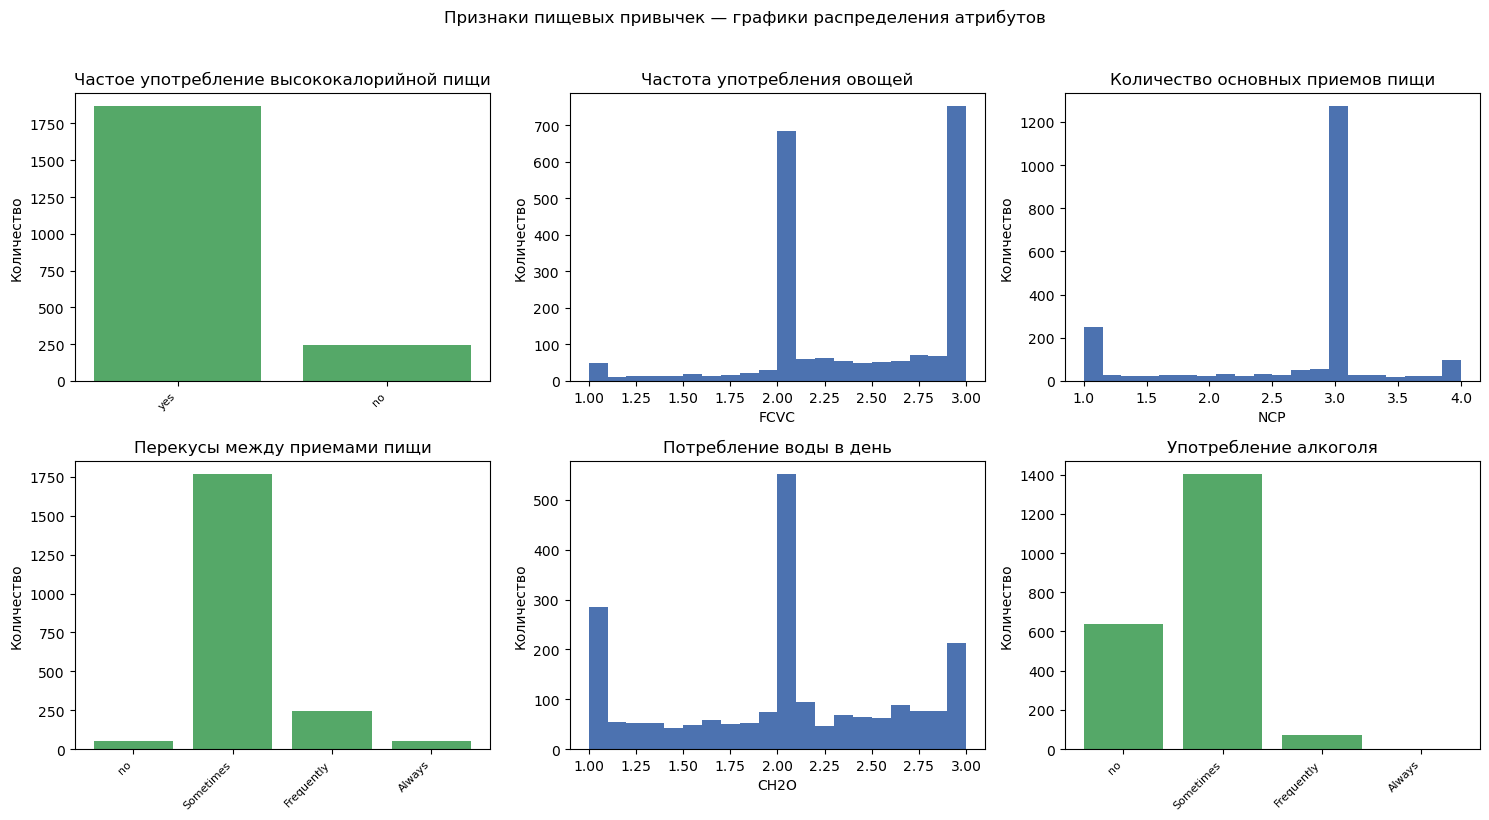

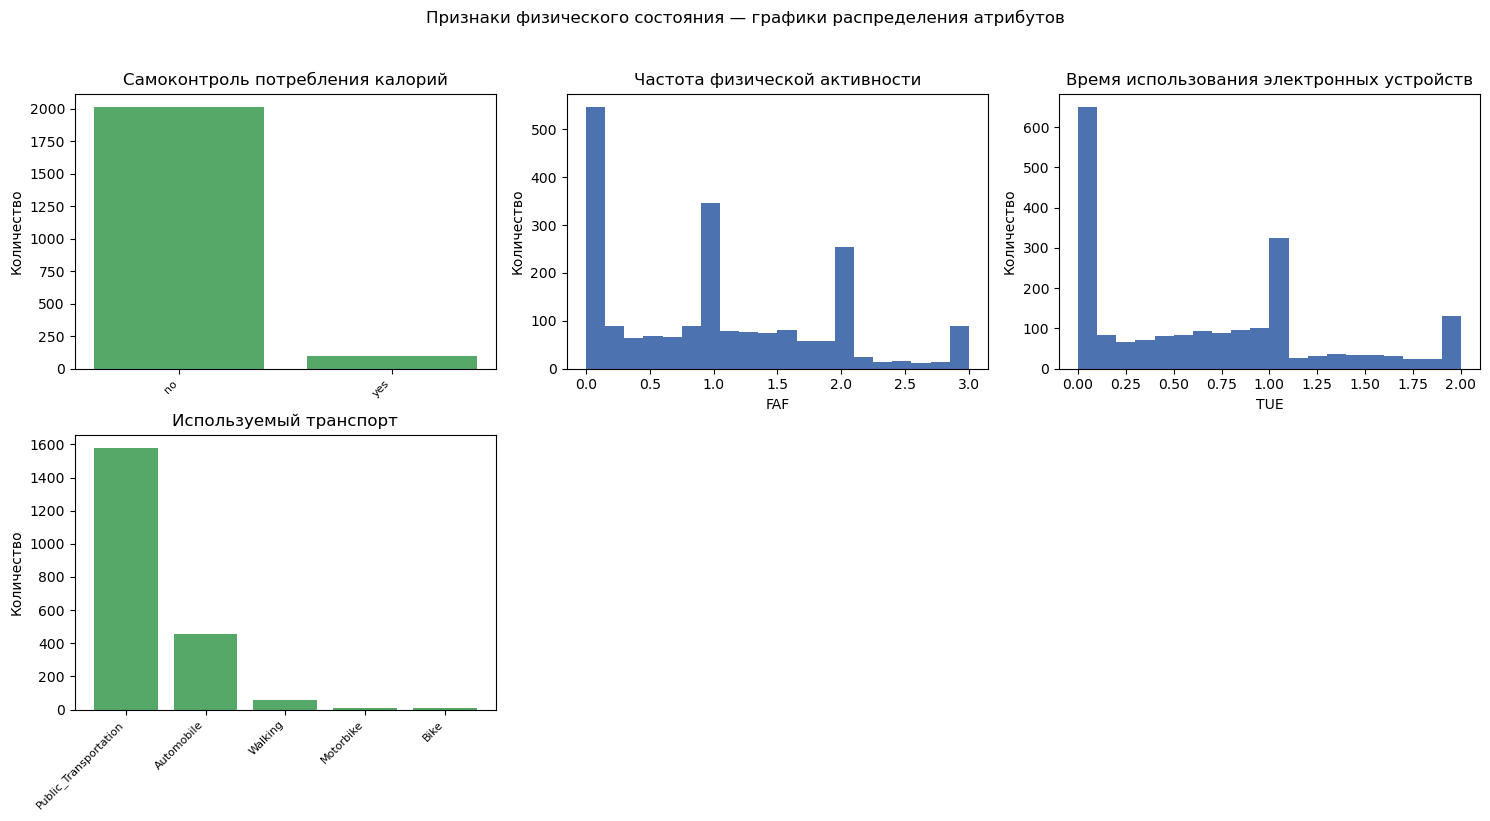

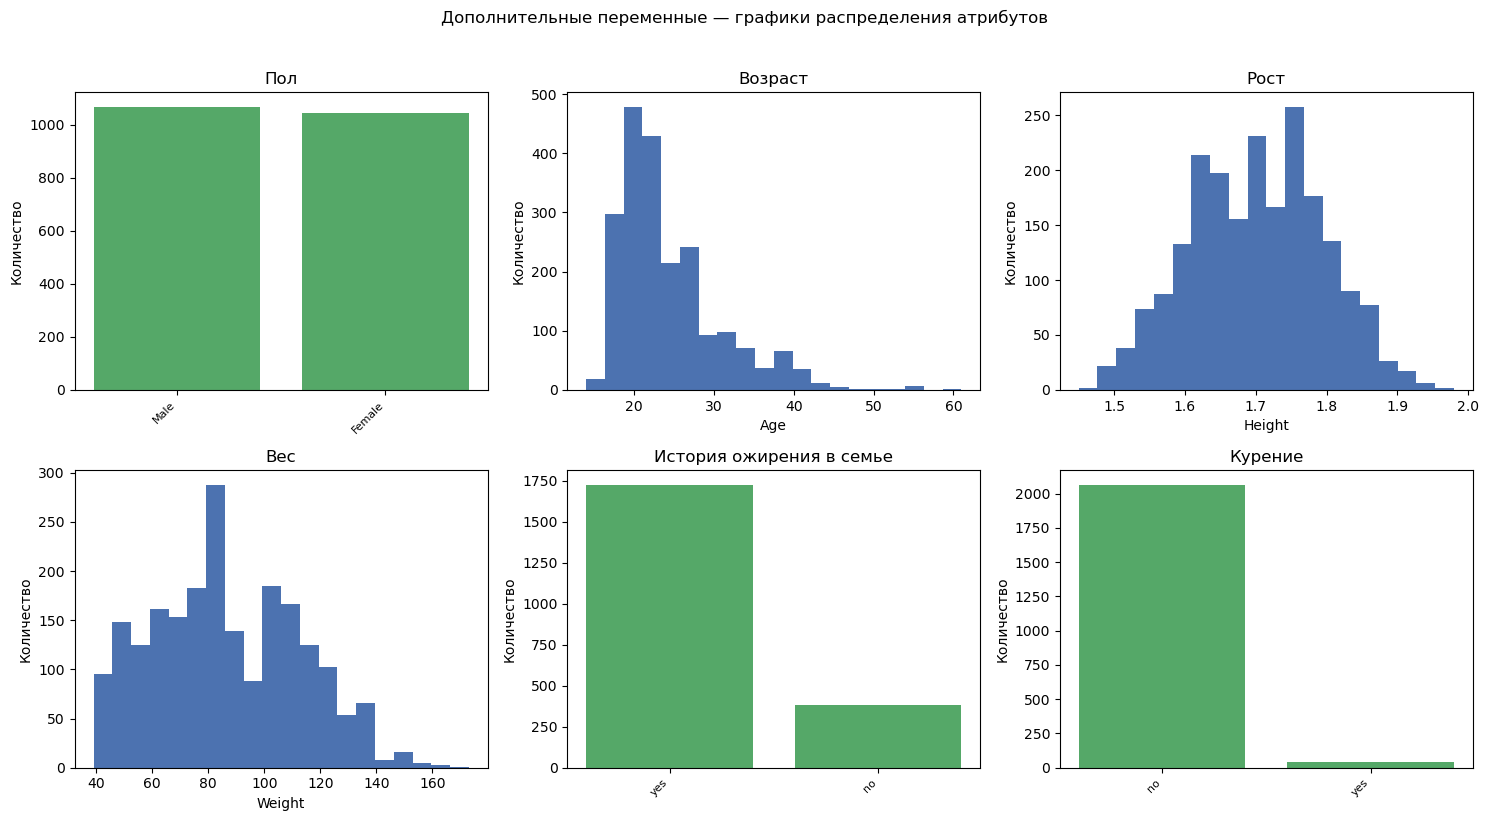

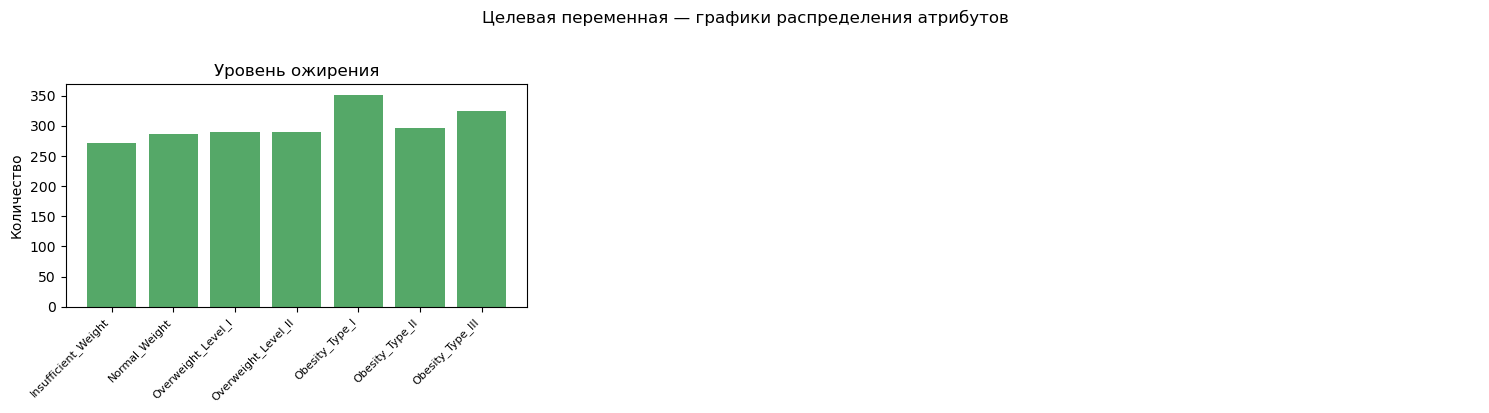

In [7]:
# Барчарты для категориальных признаков и гистограмм для числовых

# Используем универсальную функцию из utils.py: она сама решает,
# строить histogram (числовые) или bar chart (категориальные).
df_named = load_raw_df("short_names")

# Группировка признаков по типам
grouping = {}
for column in df.columns:
    group = cm_group(column)
    grouping.setdefault(group, []).append(column)

ordered_groups = cm_groups_order()
ordered_groups += [g for g in grouping.keys() if g not in ordered_groups]

display(Markdown("## Графики распределения атрибутов"))

for group in ordered_groups:
    columns = grouping.get(group, [])
    if not columns:
        continue

    n_cols = 3
    n_rows = math.ceil(len(columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
    axes = axes.flatten()

    for ax, column in zip(axes, columns):
        plot_feature_distribution(df, column, ax=ax, bins=20)

    for ax in axes[len(columns):]:
        ax.axis("off")

    fig.suptitle(f"{group} — графики распределения атрибутов", y=1.02)
    plt.tight_layout()
    plt.show()



<div style="
  border-left: 4px solid var(--jp-warn-color0);
  background: var(--jp-layout-color2);
  padding: 12px 14px;
  border-radius: 6px;
  margin: 12px 0;
  color: var(--jp-ui-font-color1);
">
<strong>⚠️ Предупреждение:</strong><br>
Часть показателей имеет дробное значение, хотя в изначальной анкете не предпологалось указания свего значения. Например вопрос "Сколько воды вы пьете в день?" имеет только ответы "Меньше литра", "От 1 до 2 л", "Более 2 л". Значит этот и другие показатели необходимо будет привести к целым значениям, а при нелинейной зависимости к категориильному типу.
</div>
